<a href="https://colab.research.google.com/github/gizelleguerra/img_processing_practice/blob/main/mnist_digit_calssification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Quickstart Tutorial using MNIST

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Oringinally the pixel values in the x values fall in the range of 0 to 255.
# We should scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


## Visualize and Explore Input Dataset

In [ ]:
# There are 60,000 images in the training set, each image is represented as 28 x 28 pixels:
x_train.shape

(60000, 28, 28)

In [ ]:
# 60k labels for the 60k training images
y_train.shape

(60000,)

In [ ]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:
x_test.shape

(10000, 28, 28)

In [ ]:
# 10k labels for the 10k test images
y_test.shape

(10000,)

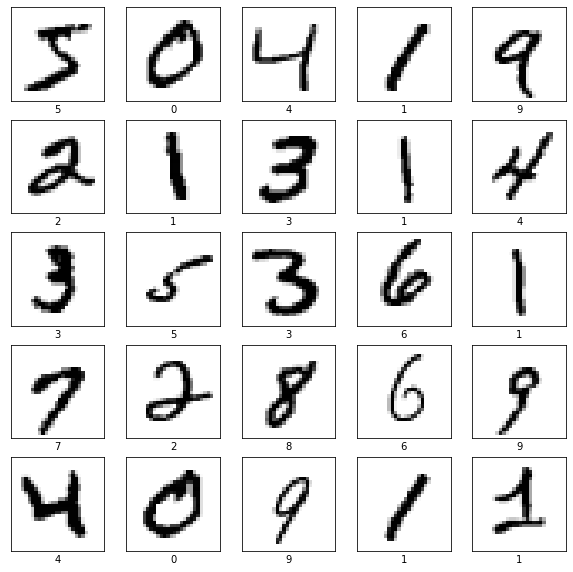

In [ ]:
# loop to plot forst 25 images in training data set to check labeling
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [ ]:
# Model Callbacks

#just clean the sessio, recomendable if we execute some times the model. 
#keras.backend.clear_session()

#This callback saves the best model based in val_accuracy
cp_mn = tf.keras.callbacks.ModelCheckpoint('model_mnist.h5', 
                                           mode='max', monitor='accuracy', 
                                           verbose=1, 
                                           save_best_only=True)

#This callback will reduce the learning rate after 3 epochs with no improvement in 
#the val_accuracy. 
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
#                              patience=3, verbose=1, mode='auto')
#This callback reduces the lr in the last epochs, but i'm not using it by the moment. 
#reduce_last_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

### Set Up layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.0370479 , -0.06041623, -0.02197058,  0.27291015,  0.1461781 ,
         0.5600678 ,  0.19122508,  0.00498237,  0.18833758, -0.19680558]],
      dtype=float32)

In [ ]:
# use argmax to check classification - largest value of predictions vector
np.argmax(predictions[0])

5

In [ ]:
# check actual value to verify
y_train[0]

5

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.08490457, 0.0829435 , 0.0861944 , 0.11575616, 0.10197768,
        0.15426064, 0.1066765 , 0.08854919, 0.10636892, 0.07236844]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

1.8691117

### Compile the Model
Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [ ]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0415 - accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.025

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0888 - accuracy: 0.9803 - 416ms/epoch - 1ms/step


[0.08877153694629669, 0.9803000092506409]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7089961e-11, 1.5102673e-12, 1.5744087e-09, 3.1719621e-06,
        1.8032992e-17, 2.4716149e-14, 9.7898055e-23, 9.9999642e-01,
        5.8135467e-12, 3.5456375e-07],
       [1.1710632e-17, 8.9108944e-08, 9.9999988e-01, 3.3068479e-11,
        9.3341321e-28, 1.0423753e-11, 5.1797520e-13, 1.1714159e-25,
        1.5981697e-14, 6.2593605e-33],
       [1.0055862e-13, 9.9998868e-01, 4.9629630e-08, 1.8326698e-08,
        1.2503481e-06, 6.7464403e-09, 3.8285211e-10, 6.4713449e-06,
        3.5359442e-06, 5.7388829e-12],
       [9.9999976e-01, 1.1531570e-19, 2.3528246e-07, 4.8567044e-15,
        7.0241809e-17, 9.0464761e-11, 1.5803876e-11, 2.6798723e-11,
        1.2164343e-20, 4.1609519e-13],
       [1.2269653e-12, 1.3664543e-16, 5.1337164e-12, 4.6381618e-17,
        9.9995255e-01, 2.0411545e-13, 4.6814434e-14, 8.0776104e-08,
        1.6372217e-14, 4.7287951e-05]], dtype=float32)>

In [ ]:
#save predictions for test set as predictions_test
predictions_test = probability_model.predict(x_test)

## Visualize Prediction Results

In [ ]:
# These functions plot the prediction results with the test image and its true label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# plot one image and results
# i = 0
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)
# plot_image(i, predictions_test[i], y_test, x_test)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions_test[i],  y_test)
# plt.show()

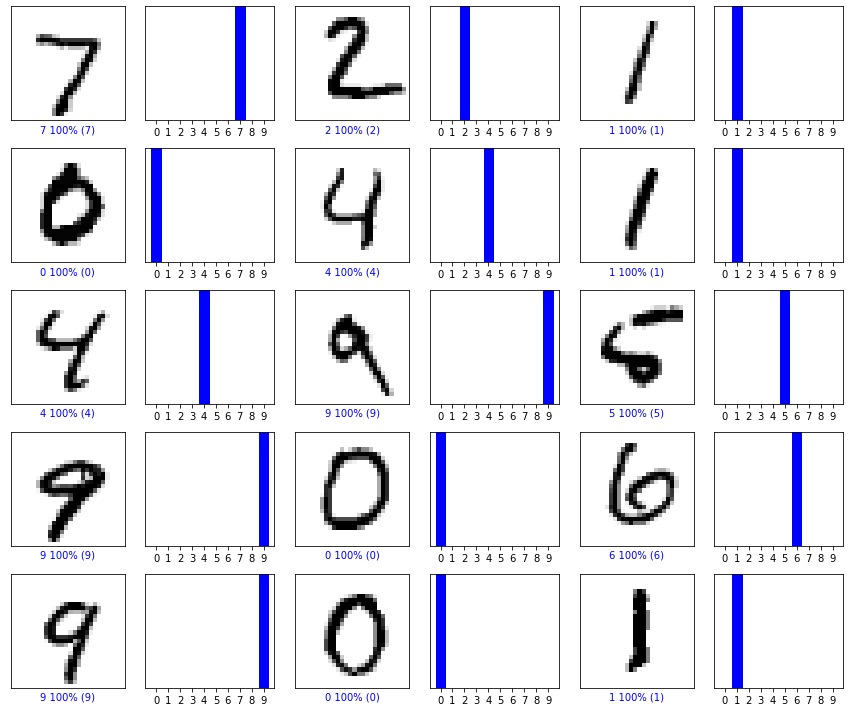

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_test[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_test[i], y_test)
plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:
def plot_loss_acc(history, firstepoch=0):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  acc = acc[firstepoch:]
  #val_acc = history.history['val_accuracy']
    
  #val_acc = val_acc[firstepoch:]
  loss = history.history['loss']
  loss=loss[firstepoch:]
  #val_loss = history.history['val_loss']
  #val_loss = val_loss[firstepoch:]

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo-', label='Training accuracy')
  #plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
  plt.title('Training accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo-', label='Training Loss')
  #plt.plot(epochs, val_loss, 'go-', label='Validation Loss')
  plt.title('Training loss')
  plt.legend()

  plt.show()

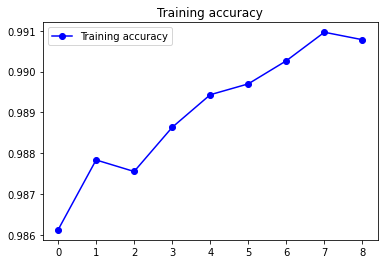

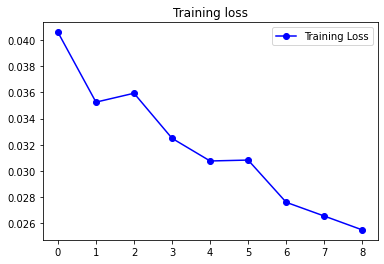

In [ ]:
plot_loss_acc(history, 1)

In [ ]:
#return predictions of the model received. 
# def get_predictions(model, X, y):
#     predictions=model.predict(X)  
#     results = pd.DataFrame(data={'Predictions': np.argmax(predictions, axis=1), 
#                             'Actuals': np.argmax(y, axis=1)})
#     predictions.shape, y.shape
#     return predictions, results

In [ ]:
#mnist_model_loaded = load_model('model_minst.h5')
#pred, results = get_predictions(mnist_model_loaded, x_test, y_val)
#results

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
